In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")
test2=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest2.csv")

In [3]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

test2.drop(['Unnamed: 0'], axis=1, inplace =True)
test2.drop(['date'], axis=1, inplace =True)
test2.drop(['DayName'], axis=1, inplace =True)

In [4]:
df.head()

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,Occupancy
0,1,17,1,23.18,27.2720,1.0,721.25,1
1,1,17,1,23.15,27.2675,1.0,714.00,1
2,1,17,1,23.15,27.2450,1.0,713.50,1
3,1,17,1,23.15,27.2000,1.0,708.25,1
4,1,17,1,23.10,27.2000,1.0,704.50,1


In [5]:
test.head()

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,Occupancy
0,1,14,1,23.7000,26.272,1.0,749.200000,1
1,1,14,1,23.7180,26.290,1.0,760.400000,1
2,1,14,1,23.7300,26.230,1.0,769.666667,1
3,1,14,1,23.7225,26.125,1.0,774.750000,1
4,1,14,1,23.7540,26.200,1.0,779.000000,1


In [6]:
#preparing the two datasets splitting the attributes with the class 
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes]
y_train = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_test = test[attributes]
y_test = test['Occupancy']

attributes = [col for col in test2.columns if col != 'Occupancy']
X_test2 = test2[attributes]
y_test2 = test2['Occupancy']

In [7]:
#Preparing the classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
from sklearn.metrics import confusion_matrix
y_predT = clf.predict(X_train)
#y_predP = clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_train, y_predT))
print('F1-score %s' % f1_score(y_train, y_predT, average=None))
print(classification_report(y_train, y_predT))
print(confusion_matrix(y_train, y_predT))

Accuracy 0.9882107331450325
F1-score [0.99247177 0.97283531]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.95      0.99      0.97      1729

    accuracy                           0.99      8143
   macro avg       0.98      0.99      0.98      8143
weighted avg       0.99      0.99      0.99      8143

[[6328   86]
 [  10 1719]]


In [9]:
#Doing the classification using Naive-Bayes, it's look amazing, almost perfect
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
y_predP = clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[1639   54]
 [   3  969]]


In [10]:
#Doing the classification using Naive-Bayes, it's look amazing, almost perfect
from sklearn.metrics import confusion_matrix
y_pred2 = clf.predict(X_test2)
y_predP2 = clf.predict_proba(X_test2)
print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

Accuracy 0.9932321575061526
F1-score [0.99570424 0.98405797]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.99      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752

[[7649   54]
 [  12 2037]]


In [11]:
#Print the roc value
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

0.9825087688594285


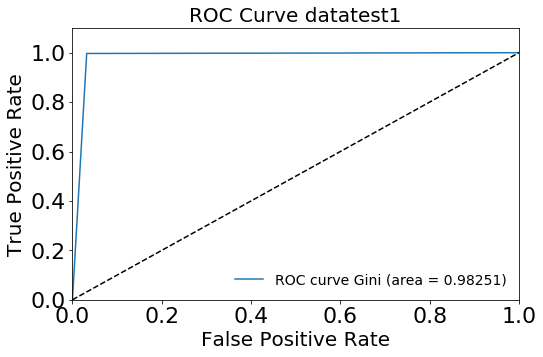

In [12]:
#Plotting the graph of the Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Gini (area = %0.5f)' % roc_auc)
plt.title('ROC Curve datatest1', fontsize=20)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

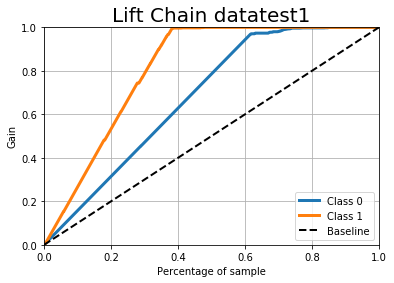

In [13]:
#Plotting the lift chart
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_predP)
plt.title('Lift Chain datatest1', fontsize=20)
plt.show()

In [14]:
lb = LabelBinarizer()
lb.fit(y_test2)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test2, y_pred2)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

0.993566614441066


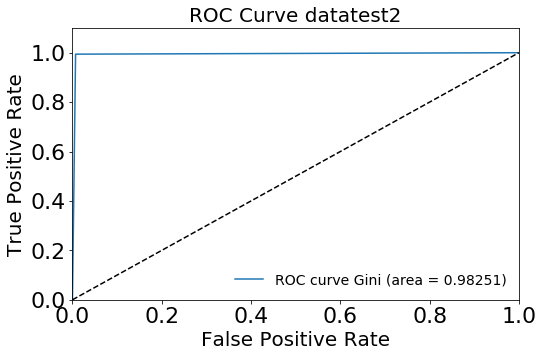

In [15]:
#Plotting the graph of the Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Gini (area = %0.5f)' % roc_auc)
plt.title('ROC Curve datatest2', fontsize=20)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

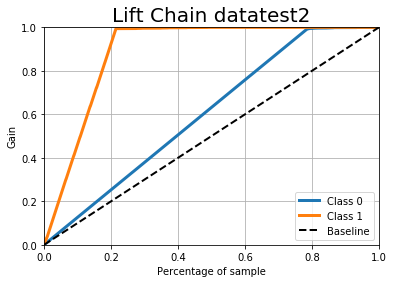

In [16]:
#Plotting the lift chart
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test2, y_predP2)
plt.title('Lift Chain datatest2', fontsize=20)
plt.show()